***
# <center>**Implementing MLPs with Keras**
***

**Keras** is a high-level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of neural networks.
It was developed by **François Chollet** as part of a research project and released as an open source project in March 2015. It quicklygained popularity owing to its ease-of-use, flexibility and beautiful design. To perform the heavy computations required by neural networks, keras-team relies on a computation backend. Moreover, since late 2016, other implementations have been released. 

#### ***Import **TensorFlow** and **tf.keras**, and print their versions:***

In [1]:

import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.18.0'

In [2]:

keras.__version__


'3.7.0'

#### ***Let’s start by building a simple image classifier:****

**Keras** provides some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST, the original California housing dataset, and more. Let’s load Fashion MNIST for practice:

In [3]:

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [4]:

x_train.shape


(60000, 28, 28)

In [5]:

x_train.dtype


dtype('uint8')

In [6]:

y_train.shape


(60000,)


Note that the dataset is already split into a training set and a test set, but there is no validation set, so let’s create one.

since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we just
 scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also converts them to floats):

In [7]:

x_test, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_test, y_train = y_train[:5000], y_train[5000:]


With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. However, for Fashion MNIST, we need the list of class names to know what we are dealing with:

In [8]:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [9]:

class_names[y_train[0]]


'Coat'

#### ***Creating the Model Using the Sequential API:***

In [10]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Code Explanation:**
- The first line creates a `Sequential` model. This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API.
-  Then, we build the `first layer` and add it to the **model**. It is a `Flatten layer` whose role is simply to convert each input image into a 1D array, if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters, it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape, this does not include the batch size, only the shape of the instances.
-  Then we add a `Dense hidden layer` with 300 neurons. It will use the `ReLU activation function`. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).
-  Then we add a `second Dense hidden layer` with 100 neurons, also using the **ReLU activation function**.
- Finally, we add a `Dense output layer` with 10 neurons (one per class), using the `softmax activation function` (because the classes are exclusive).

Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the Sequential model:

In [11]:

model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[x_train.shape[1], x_train.shape[2]]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
 ])


The model’s `summary()` method displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters.

In [12]:

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:

model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Note that **Dense layers** often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

**You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch it by name:**

In [14]:

model.layers


[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:

model.layers[1].name


'dense'

In [16]:

model.get_layer('dense_2').name


'dense_2'

#### **Compiling the Model:**
After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use.

In [17]:

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)


- First, we use the `sparse_categorical_crossen tropy` loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the `categorical_crossentropy loss` instead. If we were doing binary classification (with one or more binary labels), then we would use the `sigmoid` (i.e., logistic) activation function in the output layer instead of the `softmax activation function`, and we would use the `binary_crossentropy loss`.
- Secondly, regarding the optimizer, `sgd` simply means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the **backpropagation algorithm** described earlier (i.e., reverse-mode autodiff + Gradient Descent).
- Finally, since this is a classifier, it’s useful to measure its `accuracy` during training and evaluation.

#### ***Now the model is ready to be trained. For this we simply need to call its fit():***
 method. We pass it the input features (X_train) and the target classes (y_train), as
 well as the number of epochs to train (or else it would default to just 1, which would
 definitely not be enough to converge to a good solution). We also pass a validation set
 (this is optional): Keras will measure the loss and the extra metrics on this set at the
 end of each epoch, which is very useful to see how well the model really performs: if
 the performance on the training set is much better than on the validation set, your*Training and Evaluating the Model:**

Now the model is ready to be trained. For this we simply need to call its `fit()` method. We pass it the input features (x_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional), Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs, if the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set):

In [18]:

history = model.fit(x_train, y_train, epochs=30,validation_data=(x_test, y_test))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6871 - loss: 0.9904 - val_accuracy: 0.8282 - val_loss: 0.5128
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8253 - loss: 0.5027 - val_accuracy: 0.8354 - val_loss: 0.4777
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8418 - loss: 0.4545 - val_accuracy: 0.8556 - val_loss: 0.4254
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8532 - loss: 0.4181 - val_accuracy: 0.8380 - val_loss: 0.4348
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8587 - loss: 0.4064 - val_accuracy: 0.8658 - val_loss: 0.3886
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8601 - loss: 0.3913 - val_accuracy: 0.8704 - val_loss: 0.3736
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8702 - loss: 0.3713 - val_accuracy: 0.8780 - val_loss: 0.3541
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8730 - loss: 0

#### ***Model Training Summary***

The neural network was trained over **30 epochs**, and the following observations were made:

1. **Training Loss and Accuracy**:
   - The training loss steadily decreased from **0.9904** (Epoch 1) to **0.2287** (Epoch 30), indicating that the model effectively minimized the error on the training data.
   - Training accuracy improved consistently from **68.71%** to **91.89%**, showing the model learned to classify training samples more accurately over time.

2. **Validation Metrics**:
   - Validation accuracy started at **82.82%** and reached a maximum of **89.36%**, indicating good generalization to unseen data.
   - Validation loss decreased from **0.5128** to **0.2914**, though it fluctuated slightly in later epochs, suggesting the model stabilized.

3. **Overfitting Analysis**:
   - The gap between training and validation accuracy remained small, with validation accuracy closely tracking training accuracy (e.g., **91.89%** vs. **89.36%** in the final epoch).
   - This suggests the model avoided significant overfitting during training.

4. **Performance Plateau**:
   - Around **Epoch 26**, validation accuracy and loss began to stabilize, indicating diminishing returns from additional training.

**Overall**, the model demonstrates strong performance and generalization, achieving a validation accuracy of **89.36%** with no signs of severe overfitting.


***
#### ***Handling Class Imbalances and Visualizing Learning Curves***

1. **Dealing with Skewed Datasets**:
   - When the training set is skewed (some classes are overrepresented and others underrepresented), it is beneficial to use the `class_weight` argument in the `fit()` method.
   - `class_weight` assigns:
     - **Higher weight** to underrepresented classes.
     - **Lower weight** to overrepresented classes.
   - These weights are applied when computing the loss, helping the model balance learning across all classes.
   - For per-instance weights, use the `sample_weight` argument instead. This supersedes `class_weight` and is useful in scenarios such as:
     - Giving more weight to instances labeled by experts versus those labeled by crowdsourcing platforms.

2. **Validation Weights**:
   - While `class_weight` does not apply to the validation set, you can provide `sample_weight` for the validation set by including it as the third item in the `validation_data` tuple.

3. **Accessing Training History**:
   - The `fit()` method returns a `History` object containing:
     - `history.params`: Training parameters.
     - `history.epoch`: List of epochs.
     - `history.history`: A dictionary containing the training loss and metrics for each epoch on both the training and validation sets.

4. **Plotting Learning Curves**:
   - You can visualize the learning curves (e.g., loss and accuracy over epochs) using the `history.history` dictionary:
   - This plot provides insight into the model's performance over time, helping identify overfitting, underfitting, or stabilization trends.


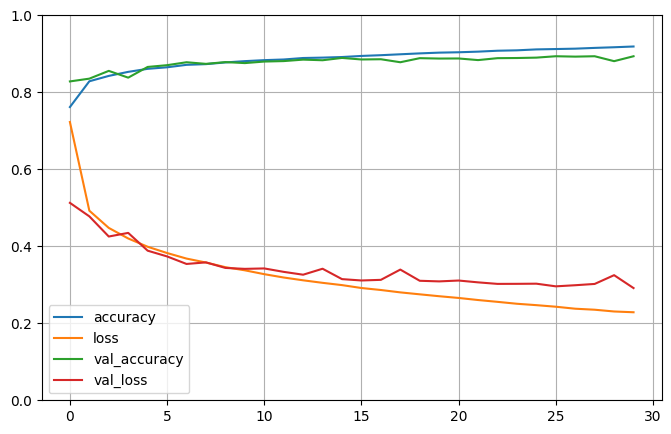

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


#### ***Learning Curve Analysis***

The following plot shows the learning curves for accuracy, loss, validation accuracy, and validation loss over epochs.

***Observations:***
1. **Accuracy (blue) and Validation Accuracy (green)**  
   - Both curves are increasing, indicating that the model is learning.  
   - Validation accuracy is slightly lower than training accuracy, which is expected.

2. **Loss (orange) and Validation Loss (red)**  
   - Both loss curves are decreasing, which is a good sign.  
   - Validation loss fluctuates but follows the overall downward trend of training loss.

***Potential Issues:***
- If the gap between training and validation accuracy keeps increasing, it could indicate **overfitting**.
- If validation loss starts increasing while training loss keeps decreasing, this would also signal **overfitting**.
***

#### ***Using the Model to Make Predictions:***
 
Next, we can use the model’s `predict()` method to make predictions on new instances. Since we don’t have actual new instances, we will just use the first 3 instances of the test set:

In [25]:

x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.66, 0.01, 0.01, 0.18, 0.01, 0.  , 0.12, 0.  , 0.  , 0.  ]],
      dtype=float32)

**Understanding the Code Execution:**
 - `x_new = x_test[:3]`: Selects the first three instances from the test dataset.
 - `y_proba = model.predict(x_new)`: Predicts class probabilities for these three instances.
 - `y_proba.round(2)`: Rounds the probabilities to two decimal places for better readability.

**Interpreting the Output (Probability Distribution):**

* Each row represents one test instance, and each column represents the predicted probability for a specific class.

  * **First Instance:**
     * `[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]`
     * Highest probability `(1.0)` for the 9th class (index 8) → Model confidently predicts class 8.

  * **Second Instance:**
     * `[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]`
     * Highest probability `(1.0)` for the 1st class (index 0) → Model confidently predicts class 0.

  * **Third Instance:**
     * `[0.66, 0.01, 0.01, 0.18, 0.01, 0. , 0.12, 0. , 0. ]`
     * Highest probability `(0.66)` for the 1st class (index 0) → Model predicts class 0, but with less certainty compared to the previous cases.